In [1]:
import os
os.chdir("/Users/pratham/Downloads/videoGameReviews")

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame 
import nltk

from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error
import json

In [8]:
import pandas as pd

data = pd.read_json('/Users/pratham/Downloads/videoGameReviews/reviews_Video_Games_5.json', lines=True)

In [14]:
data.to_csv("videoreviews.csv", encoding='utf-8', index=False)

In [15]:
df = pd.read_csv("videoreviews.csv")

In [16]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0700099867,"[8, 12]",1,Installing the game was a struggle (because of...,"07 9, 2012",A2HD75EMZR8QLN,123,Pay to unlock content? I don't think so.,1341792000
1,0700099867,"[0, 0]",4,If you like rally cars get this game you will ...,"06 30, 2013",A3UR8NLLY1ZHCX,"Alejandro Henao ""Electronic Junky""",Good rally game,1372550400
2,0700099867,"[0, 0]",1,1st shipment received a book instead of the ga...,"06 28, 2014",A1INA0F5CWW3J4,"Amazon Shopper ""Mr.Repsol""",Wrong key,1403913600
3,0700099867,"[7, 10]",3,"I got this version instead of the PS3 version,...","09 14, 2011",A1DLMTOTHQ4AST,ampgreen,"awesome game, if it did not crash frequently !!",1315958400
4,0700099867,"[2, 2]",4,I had Dirt 2 on Xbox 360 and it was an okay ga...,"06 14, 2011",A361M14PU2GUEG,"Angry Ryan ""Ryan A. Forrest""",DIRT 3,1308009600


In [20]:
''' 
reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
asin - ID of the product, e.g. 0000013714
reviewerName - name of the reviewer
helpful - helpfulness rating of the review, e.g. 2/3
reviewText - text of the review
overall - rating of the product
summary - summary of the review
unixReviewTime - time of the review (unix time)
reviewTime - time of the review (raw)

'''

' \nreviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B\nasin - ID of the product, e.g. 0000013714\nreviewerName - name of the reviewer\nhelpful - helpfulness rating of the review, e.g. 2/3\nreviewText - text of the review\noverall - rating of the product\nsummary - summary of the review\nunixReviewTime - time of the review (unix time)\nreviewTime - time of the review (raw)\n\n'

In [21]:
print(df.columns)
print(df.shape)

Index([u'asin', u'helpful', u'overall', u'reviewText', u'reviewTime',
       u'reviewerID', u'reviewerName', u'summary', u'unixReviewTime'],
      dtype='object')
(231780, 9)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231780 entries, 0 to 231779
Data columns (total 9 columns):
asin              231780 non-null object
helpful           231780 non-null object
overall           231780 non-null int64
reviewText        231736 non-null object
reviewTime        231780 non-null object
reviewerID        231780 non-null object
reviewerName      228953 non-null object
summary           231770 non-null object
unixReviewTime    231780 non-null int64
dtypes: int64(2), object(7)
memory usage: 15.9+ MB


In [24]:
#Check for Duplicate ID
sum(df.reviewerID.duplicated())

209431

In [25]:
count = df.groupby("asin", as_index=False).count()
mean = df.groupby("asin", as_index=False).mean()

dfMerged = pd.merge(df, count, how='right', on=['asin'])
dfMerged

,asin,helpful_x,overall_x,reviewText_x,reviewTime_x,reviewerID_x,reviewerName_x,summary_x,unixReviewTime_x,helpful_y,overall_y,reviewText_y,reviewTime_y,reviewerID_y,reviewerName_y,summary_y,unixReviewTime_y
0,0700099867,"[8, 12]",1,Installing the game was a struggle (because of...,"07 9, 2012",A2HD75EMZR8QLN,123,Pay to unlock content? I don't think so.,1341792000,25,25,25,25,25,25,25,25
1,0700099867,"[0, 0]",4,If you like rally cars get this game you will ...,"06 30, 2013",A3UR8NLLY1ZHCX,"Alejandro Henao ""Electronic Junky""",Good rally game,1372550400,25,25,25,25,25,25,25,25
2,0700099867,"[0, 0]",1,1st shipment received a book instead of the ga...,"06 28, 2014",A1INA0F5CWW3J4,"Amazon Shopper ""Mr.Repsol""",Wrong key,1403913600,25,25,25,25,25,25,25,25
3,0700099867,"[7, 10]",3,"I got this version instead of the PS3 version,...","09 14, 2011",A1DLMTOTHQ4AST,ampgreen,"awesome game, if it did not crash frequently !!",1315958400,25,25,25,25,25,25,25,25
4,0700099867,"[2, 2]",4,I had Dirt 2 on Xbox 360 and it was an okay ga...,"06 14, 2011",A361M14PU2GUEG,"Angry Ryan ""Ryan A. Forrest""",DIRT 3,1308009600,25,25,25,25,25,25,25,25
5,0700099867,"[0, 0]",4,"Overall this is a well done racing game, with ...","05 11, 2013",A2UTRVO4FDCBH6,A.R.G.,"Good racing game, terrible Windows Live Requir...",1368230400,25,25,25,25,25,25,25,25
6,0700099867,"[11, 13]",5,Loved playing Dirt 2 and I thought the graphic...,"08 14, 2011",AN3YYDZAS3O1Y,Bob,A step up from Dirt 2 and that is terrific!,1313280000,25,25,25,25,25,25,25,25
7,0700099867,"[1, 4]",1,I can't tell you what a piece of dog**** this ...,"11 24, 2012",AQTC623NCESZW,Chesty Puller,Crash 3 is correct name AKA Microsoft,1353715200,25,25,25,25,25,25,25,25
8,0700099867,"[0, 1]",4,I initially gave this one star because it was ...,"11 14, 2012",A1QJJU33VNC4S7,D@rkFX,A great game ruined by Microsoft's account man...,1352851200,25,25,25,25,25,25,25,25
9,0700099867,"[1, 1]",2,I still haven't figured this one out. Did ever...,"02 8, 2014",A2JLT2WY0F2HVI,D. Sweetapple,Couldn't get this one to work,1391817600,25,25,25,25,25,25,25,25


In [26]:
#rename column
dfMerged["totalReviewers"] = dfMerged["reviewerID_y"]
dfMerged["overallScore"] = dfMerged["overall_x"]
dfMerged["summaryReview"] = dfMerged["summary_x"]

dfNew = dfMerged[['asin','summaryReview','overallScore',"totalReviewers"]]

In [30]:
#Selecting products which have more than 100 reviews
dfMerged = dfMerged.sort_values(by='totalReviewers', ascending=False)
dfCount = dfMerged[dfMerged.totalReviewers >= 100]
dfCount.head()

,asin,helpful_x,overall_x,reviewText_x,reviewTime_x,reviewerID_x,reviewerName_x,summary_x,unixReviewTime_x,helpful_y,overall_y,reviewText_y,reviewTime_y,reviewerID_y,reviewerName_y,summary_y,unixReviewTime_y,totalReviewers,overallScore,summaryReview
217046,B00BGA9WK2,"[0, 1]",5,I did not preorder my PS4 at Amazon because by...,"11 17, 2013",A3KK47W2XBVVUJ,Zoe,"Futuristic device, ascetically perfect, superb...",1384646400,802,802,801,802,802,798,802,802,802,5,"Futuristic device, ascetically perfect, superb..."
217037,B00BGA9WK2,"[4, 9]",4,"This is a review that will likely upset some, ...","11 29, 2013",A11W4GQ57ZUSWY,W. Moore,No need to rush. Not wowed yet. WIFI issues.,1385683200,802,802,801,802,802,798,802,802,802,4,No need to rush. Not wowed yet. WIFI issues.
217025,B00BGA9WK2,"[1, 3]",5,I love the Playstation 4 I feel like it's an u...,"07 5, 2014",A1L8YTICTVN5,Vincent,gotta love,1404518400,802,802,801,802,802,798,802,802,802,5,gotta love
217045,B00BGA9WK2,"[6, 32]",1,I should have just brought my black shiny new ...,"11 21, 2013",A3RR7N0Y5OPRNF,Z. Duncan,I'm just glad I pre order a Xbox One as well.,1384992000,802,802,801,802,802,798,802,802,802,1,I'm just glad I pre order a Xbox One as well.
216647,B00BGA9WK2,"[3, 5]",5,The one and only PS4! ENOUGH SAID!...Get it wh...,"02 16, 2014",A16PO950L6CX8W,Joe,Best next gen gaming console!,1392508800,802,802,801,802,802,798,802,802,802,5,Best next gen gaming console!


In [32]:
#Grouping all the summary Reviews by product ID
dfProductReview = df.groupby("asin", as_index=False).mean()
ProductReviewSummary = dfCount.groupby("asin")["summaryReview"].apply(list)
ProductReviewSummary = pd.DataFrame(ProductReviewSummary)
ProductReviewSummary.to_csv("ProductReviewSummary.csv")

In [34]:
dfProductReview.head()

,asin,overall,unixReviewTime
0,0700099867,2.880000,1.349730e+09
1,6050036071,4.285714,1.333300e+09
2,7100027950,3.875000,1.313248e+09
3,7293000936,4.166667,1.344355e+09
4,8176503290,3.000000,1.343088e+09


In [35]:
df3 = pd.read_csv("ProductReviewSummary.csv")
df3 = pd.merge(df3, dfProductReview, on="asin", how='inner')

In [36]:
df3 = df3[['asin','summaryReview','overall']]

In [37]:
df3.head()

,asin,summaryReview,overall
0,B00000DMB3,"['Golden Standard of Video Games', 'Great Game...",4.767123
1,B00000F1GM,"['Hours of Fun!!!', 'must own for that old sch...",4.622642
2,B00000JRSB,"['Not bad, but still a bit overrated.', 'One o...",4.665254
3,B00000K2R4,"['Dreamcast dead? No way!', 'An honest unbiase...",4.606061
4,B0000296O5,"['Sickeningly underrated', 'The Romance of Zer...",4.137931


In [38]:
#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

In [39]:
#reset index and drop duplicate rows
df3["summaryClean"] = df3["summaryReview"].apply(cleanReviews)
df3 = df3.drop_duplicates(['overall'], keep='last')
df3 = df3.reset_index()

In [40]:
reviews = df3["summaryClean"] 
countVector = CountVectorizer(max_features = 300, stop_words='english') 
transformedReviews = countVector.fit_transform(reviews) 

dfReviews = DataFrame(transformedReviews.A, columns=countVector.get_feature_names())
dfReviews = dfReviews.astype(int)

In [41]:
#save 
dfReviews.to_csv("dfReviews.csv")

In [42]:
# First let's create a dataset called X
X = np.array(dfReviews)
 # create train and test
tpercent = 0.9
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)


In [43]:

# KNN classifier to find similar products
print(lentrain)
print(lentest)

285
32


In [44]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

In [45]:

#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")

('Based on product reviews, for ', 'B0086V5UF0', ' average rating is ', 4.5673076923076925)
('The first similar product is ', 'B003ZHMMEM', ' average rating is ', 4.4078947368421053)
('The second similar product is ', 'B00354NAYG', ' average rating is ', 3.6888888888888891)
-----------------------------------------------------------
('Based on product reviews, for ', 'B0087OZ5FG', ' average rating is ', 4.3243243243243246)
('The first similar product is ', 'B003NSLGW2', ' average rating is ', 4.1782178217821784)
('The second similar product is ', 'B003VANOFY', ' average rating is ', 3.9736842105263159)
-----------------------------------------------------------
('Based on product reviews, for ', 'B0088MVPFQ', ' average rating is ', 4.3161764705882355)
('The first similar product is ', 'B0053BCMAC', ' average rating is ', 4.116504854368932)
('The second similar product is ', 'B002BSA388', ' average rating is ', 4.6439393939393936)
--------------------------------------------------------

In [46]:
print ("Based on product reviews, for ", df3["asin"][260] ," average rating is ",df3["overall"][260])
print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
print ("-----------------------------------------------------------")

('Based on product reviews, for ', 'B0053BCML6', ' average rating is ', 4.5882352941176467)
('The first similar product is ', 'B000FQBPCQ', ' average rating is ', 4.5111111111111111)
('The second similar product is ', 'B002BSC54I', ' average rating is ', 4.1489361702127656)
-----------------------------------------------------------


In [47]:
#Predicting Review Score
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          3       0.78      0.58      0.67        12
          4       0.78      0.90      0.84        20

avg / total       0.78      0.78      0.77        32



In [48]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.78125


In [49]:

print(mean_squared_error(df5_test_target, knnpreds_test))

0.21875


In [50]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)
#print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

             precision    recall  f1-score   support

          3       1.00      0.58      0.74        12
          4       0.80      1.00      0.89        20

avg / total       0.88      0.84      0.83        32



In [51]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.84375


In [52]:
print(mean_squared_error(df5_test_target, knnpreds_test))


0.15625


In [53]:
cluster = df.groupby("overall")["summary"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["summaryClean"] = cluster1["summary"].apply(cleanReviews)

In [54]:

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

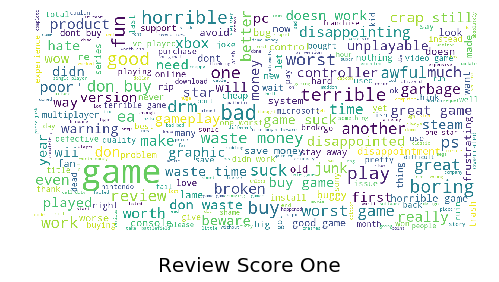

In [55]:
show_wordcloud(cluster1["summaryClean"][0], title = "Review Score One")

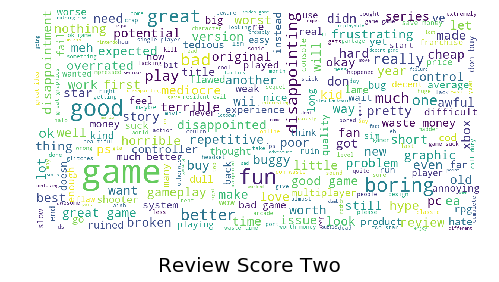

In [56]:
show_wordcloud(cluster1["summaryClean"][1] , title = "Review Score Two")